# Twitter Data (Week 2)

### 1.1 Fraction Suspended

The code below creates bar graphs for the four hashtag datasets, with the x-axis being the number of times an account tweeted about a given hashtag (e.g., #QAnon) and the proportion of those users that were suspended on the y-axis.

As observed, the datasets lack sufficient data, particularly for BTSArmy and Khashoggi. Only 3570 and 1313 users tweeted once for each hashtag, respectively, with a sharp decline to low single-digit users. I have created an inclusion criterion for the graph, requiring at least three users for a particular tweet count to be included.

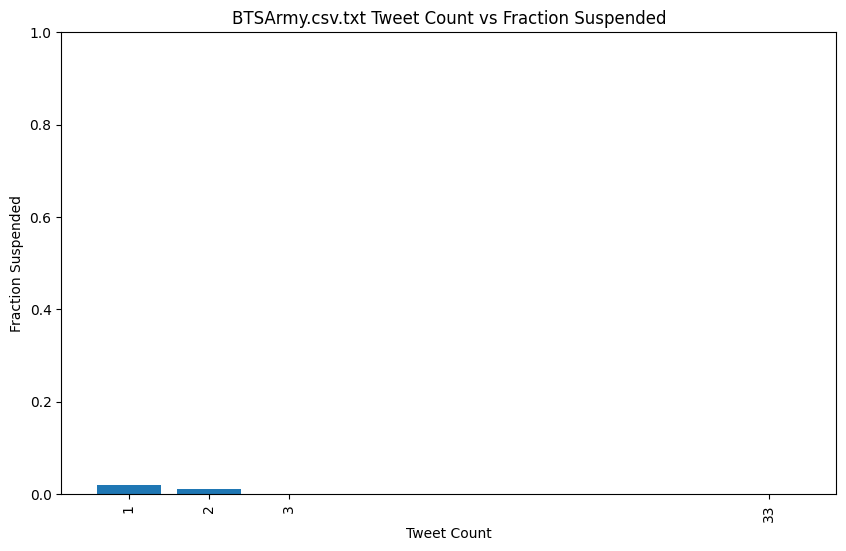

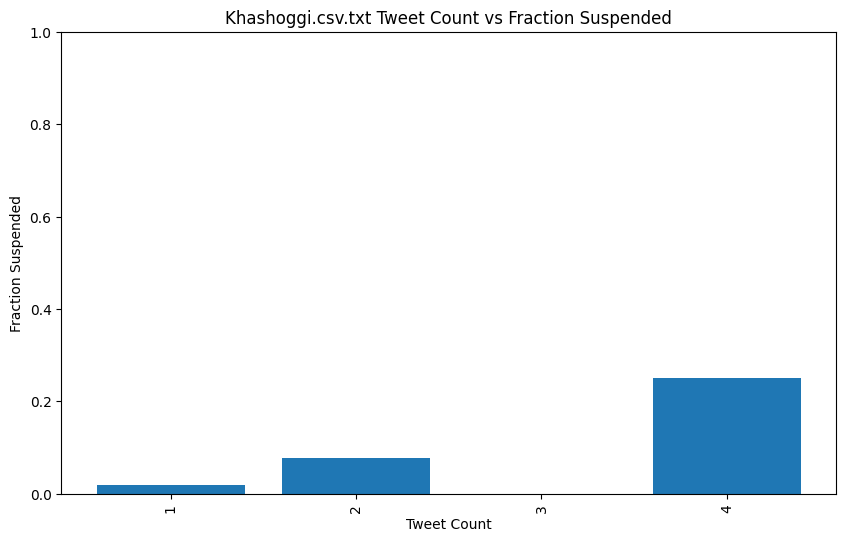

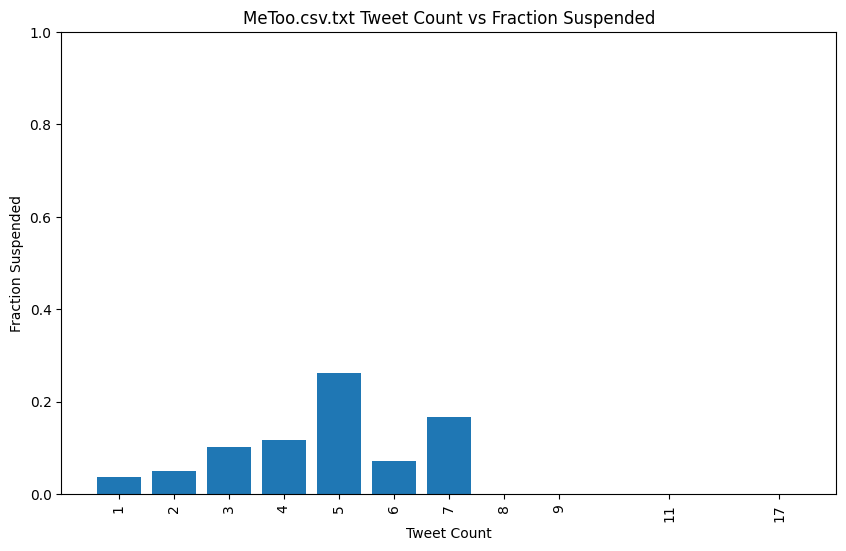

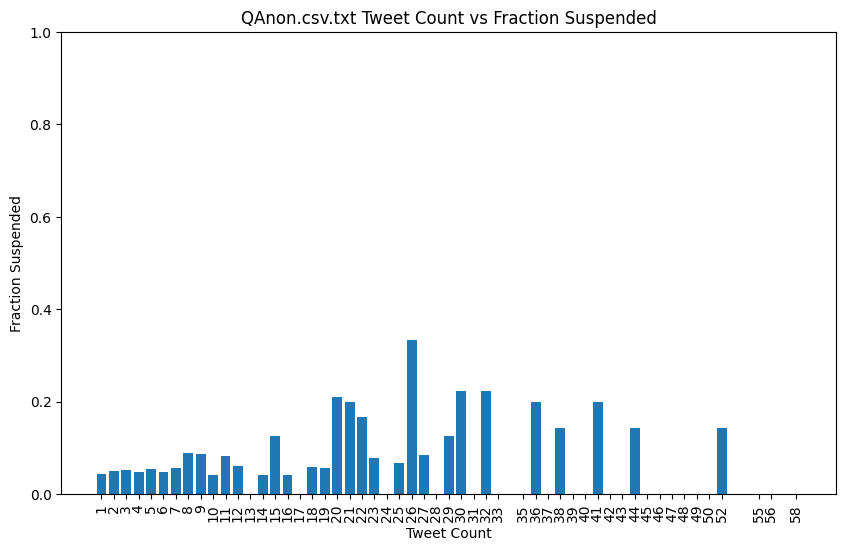

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['./Twitter_Data/BTSArmy.csv.txt', './Twitter_Data/Khashoggi.csv.txt', './Twitter_Data/MeToo.csv.txt', './Twitter_Data/QAnon.csv.txt']

for file in files:
    # Read the CSV file
    data = pd.read_csv(file)

    # Group by total_tweets and aggregate the total no. of users and suspended accounts
    grouped_data = data.groupby('user_id').agg({'tweet_id': 'count', 'suspended': 'max'}).reset_index()
    grouped_data.columns = ['user_id', 'total_tweets', 'suspended']

    # Sort the data by total_tweets in ascending order
    grouped_data = grouped_data.sort_values(by='total_tweets', ascending=True)

    # Save 
    output_file = file.replace('.csv.txt', '_Tweet_By_User.csv.txt')
    grouped_data.to_csv(output_file, index=False)

    # Group by total_tweets and aggregate the total no. of users and suspended accounts
    grouped_tweet_count = grouped_data.groupby('total_tweets').agg({'user_id': 'count', 'suspended': 'sum'}).reset_index()
    grouped_tweet_count.columns = ['tweet_count', 'total_users', 'total_suspended']

    # Fraction of suspended accounts
    grouped_tweet_count['fraction_suspended'] = grouped_tweet_count['total_suspended'] / grouped_tweet_count['total_users']

    # Save 
    output_file = file.replace('.csv.txt', '_Tweet_By_Count.csv.txt')
    grouped_tweet_count.to_csv(output_file, index=False)

    # print tweet count data
    #print(" Tweet count data of " + file.split("Data/")[1] + "\n")
    #print(grouped_tweet_count.to_string(index=False))


    # Read the new file
    data = pd.read_csv(output_file)
    data = data[data['total_users'] >= 3] # inclusion criteria
    plt.figure(figsize=(10, 6))

    # plot the bar
    plt.bar(data.index, data['fraction_suspended'])

    # x-axis with ticks
    plt.xticks(data.index, data['tweet_count'], rotation=90)
    plt.ylim(0, 1)
    plt.xlabel('Tweet Count')
    plt.ylabel('Fraction Suspended')
    plt.title(f'{file.split("Data/")[1]} Tweet Count vs Fraction Suspended')
    plt.show()

# EU Data

### 2.1 Non-Compliance  (Week 2-3)

Non-Compliance of a country can be determined by the number of LFN, RO, and RFs. The code below plots a graph that maps the total no. of LFNs, RO, and RF for each country. The highest no. of LFNs recorded were for Italy, Greece, and Portugal.


Week 3:

I added the total number of Non-Conformity and Non-Communcation proceedings per country to the graphs as well. 

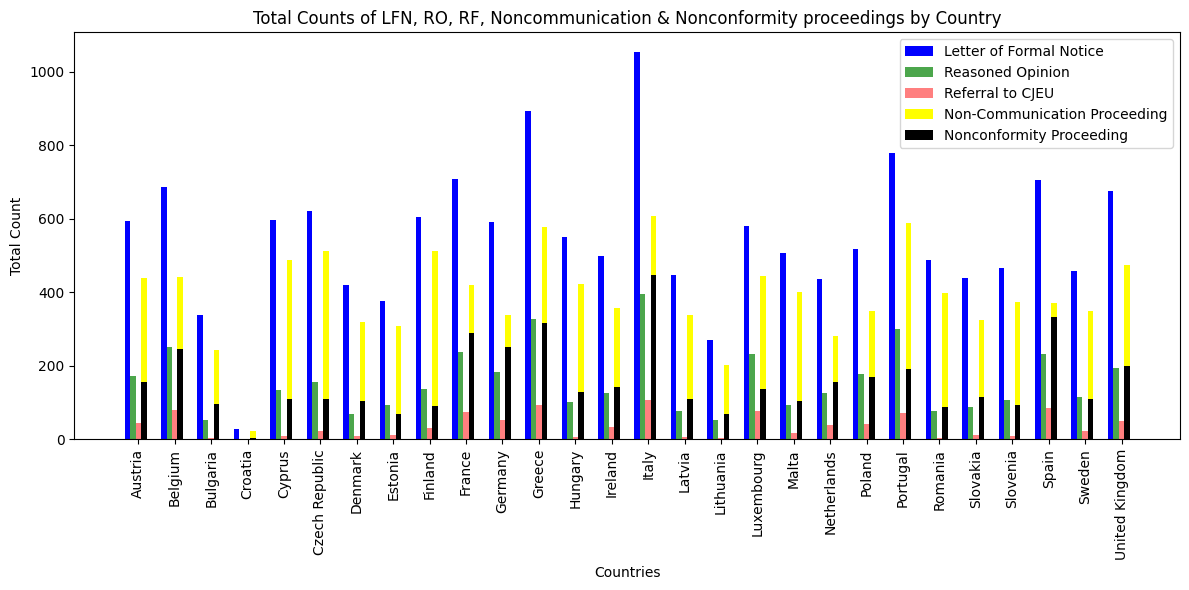

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Group by member_state
grouped_data = data.groupby('member_state').agg({
    'LFN_258': 'sum',
    'RO_258': 'sum',
    'RF_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

grouped_data_2 =  data.groupby('member_state').agg({
    'incorrect': lambda x: x.eq(0).sum()
}).reset_index()

plt.figure(figsize=(12, 6))

# Get the countries
countries = grouped_data['member_state']

lfn_counts = grouped_data['LFN_258']
ro_counts = grouped_data['RO_258']
rf_counts = grouped_data['RF_258']
incorrect_1_counts = grouped_data['incorrect']
incorrect_0_counts = grouped_data_2['incorrect']

bar_width = 0.15
x_positions = np.arange(len(countries))

# Plot the bars for each category
plt.bar(x_positions - 2 * bar_width, lfn_counts, width=bar_width, label='Letter of Formal Notice', color='blue')
plt.bar(x_positions - bar_width, ro_counts, width=bar_width, label='Reasoned Opinion', color='green', alpha=0.7)
plt.bar(x_positions, rf_counts, width=bar_width, label='Referral to CJEU', color='red', alpha=0.5)
plt.bar(x_positions + bar_width, incorrect_0_counts, width=bar_width, label='Non-Communication Proceeding', color='yellow')
plt.bar(x_positions + bar_width, incorrect_1_counts, width=bar_width, label='Nonconformity Proceeding', color='black')


plt.xticks(x_positions, countries, rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.title('Total Counts of LFN, RO, RF, Noncommunication & Nonconformity proceedings by Country')
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd

data = pd.read_csv('./EU_Data/eucommission.csv')

# Total number of LFNs
total_lfns = data['LFN_258'].sum()

# Total number of ROs
total_ros = data['RO_258'].sum()

# Total number of ROs
total_rf = data['RF_258'].sum()

# Elections that overlapped with LFN Date
total_lfn_election = data['LFN_election'].sum()

print("Total Number of LFNs:", total_lfns)
print("Total Number of ROs:", total_ros)
print("Total Number of RFs:", total_rf)
print("Total Number of LFN_election:", total_lfn_election)


Total Number of LFNs: 15333
Total Number of ROs: 4308
Total Number of RFs: 1016
Total Number of LFN_election: 3145


### Non-Compliance Data Over Time  (Week 2-3)

I plotted the number of LFNs a country receives over time. To improve visualization, I implemented a rolling window approach. I used a fixed window size of 6 months and calculated the average LFNs within that window for every month.

The combination of all countries in a graph resulted in a cluttered and visually confusing representation. 

#### Overall Trends:

The number of Letters of Formal Notice (LFN_258 = 1) issued by the Commission peaked in 2004 and then generally decreased over time, with some fluctuations.

The number of Reasoned Opinions (RO_258 = 1) and referrals to the CJEU (RF_258 = 1) also peaked in the mid-2000s and then decreased.

The number of Nonconformity proceedings (incorrect = 1) peaked in 2006 and then decreased.

The number of proceedings overlapping an election in the LFN stage (LFN_election = 1) peaked in 2006 and then generally decreased, with some fluctuations

#### Week 3:

I have plotted trends for the top 5 populated countries for the total no. of LFNs, ROs, and RFs over time.


      LFN_258  RO_258  RF_258  incorrect  LFN_election
year                                                  
2003     1405     456     187        344           215
2004     1846     515     143        347           264
2005     1528     504     173        513           305
2006     1447     527     150        606           470
2007     1682     448     134        517           362
2008     1276     415     114        500           221
2009     1034     310      57        506           253
2010     1138     280      21        292           212
2011     1338     365       7        198           315
2012      654     159      14        203           131
2013      651     163      10        187           131
2014      698     131       6        161           153
2015      423      33       0         52            90
2016      213       2       0          9            23


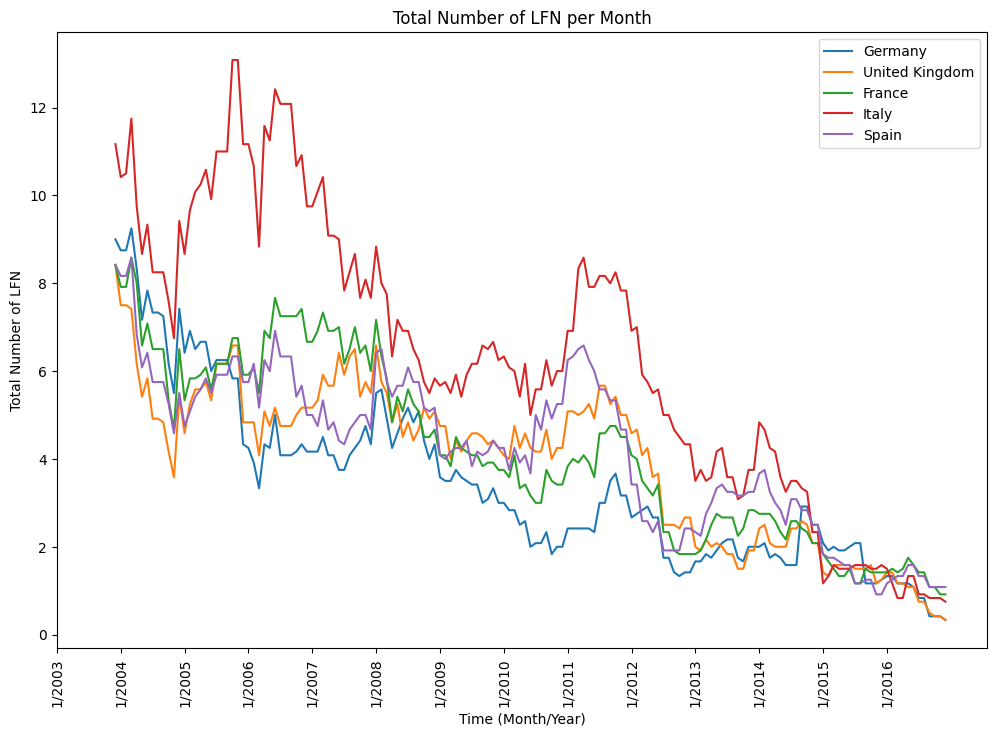

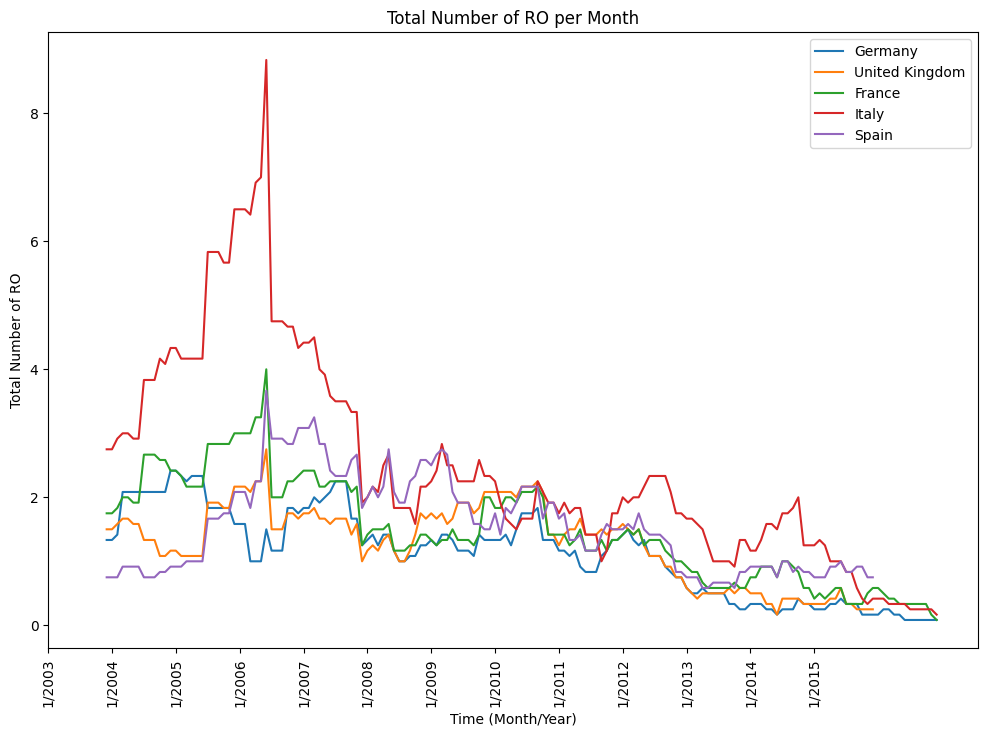

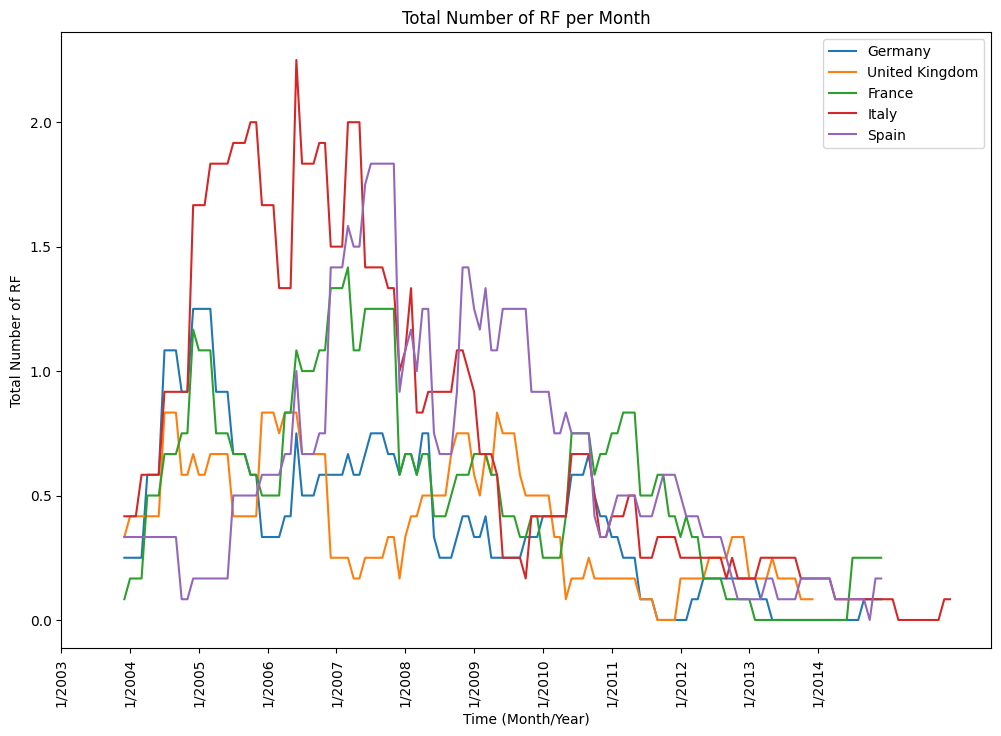

In [12]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('./EU_Data/eucommission.csv')

# Group the data by year
grouped_data = data.groupby('year').agg({'LFN_258': 'sum', 'RO_258': 'sum', 'RF_258': 'sum', 'incorrect': 'sum', 'LFN_election': 'sum'})

print(grouped_data)

# Top 5 Populated Countries
countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

dataset = ['date_LFN_258', 'date_RO_258' , 'date_RF_258']

for date in dataset:
    plt.figure(figsize=(12, 8))
    for country in countries:
        # Filter the data for the current country
        country_data = data[data['member_state'] == country]

        # Remove rows with NA values in the 'date_LFN_258' column
        country_data = country_data.dropna(subset=[date])

        # Convert 'date_LFN_258' to datetime objects
        date_lfn_country = country_data[date].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

        # Group the data by month and year and count the number of occurrences
        counts = date_lfn_country.groupby([date_lfn_country.dt.year, date_lfn_country.dt.month]).count()

        # assign a value of 0 for missing months
        all_months = pd.MultiIndex.from_product([range(counts.index.get_level_values(0).min(), counts.index.get_level_values(0).max() + 1),
                                                range(1, 13)],
                                                names=['Year', 'Month'])
        counts = counts.reindex(all_months, fill_value=0)

        # Rolling average with a window size of 12 months
        counts = counts.rolling(window=12).mean()
        
        counts.index = counts.index.map(lambda x: f'{x[1]}/{x[0]}')

        plt.plot(counts.index, counts.values, label=country)
        plt.xticks(rotation=90)

    plt.xlabel('Time (Month/Year)')
    plt.ylabel('Total Number of ' + date.split('_')[1])
    plt.title('Total Number of ' + date.split('_')[1] + ' per Month')
    plt.legend()
    plt.xticks(range(0, len(counts.index), 12), counts.index[::12], rotation=90)
    #plt.savefig('plot.png')
    # Display the plot
    plt.show()


### Left-Right Ideology  (Week 2-3)
The data set contains a continuous variable called out_left_cont that indicates the difference in right ideology between the ruling and the largest opposition party. Larger values indicate the ruling party is more left-wing compared to the opposition.

I have plotted graphs to observe the change of the variable over time for each country. Again, I tried putting all countries on the same graph but their combination resulted in a cluttered and visually confusing representation. Therefore, I decided to plot the trends for the top 5 populous countries.

/tmp/ipykernel_1385/196191518.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_left_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/196191518.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_left_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/196191518.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_left_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/196191518.py:29: FutureWarning: The frame

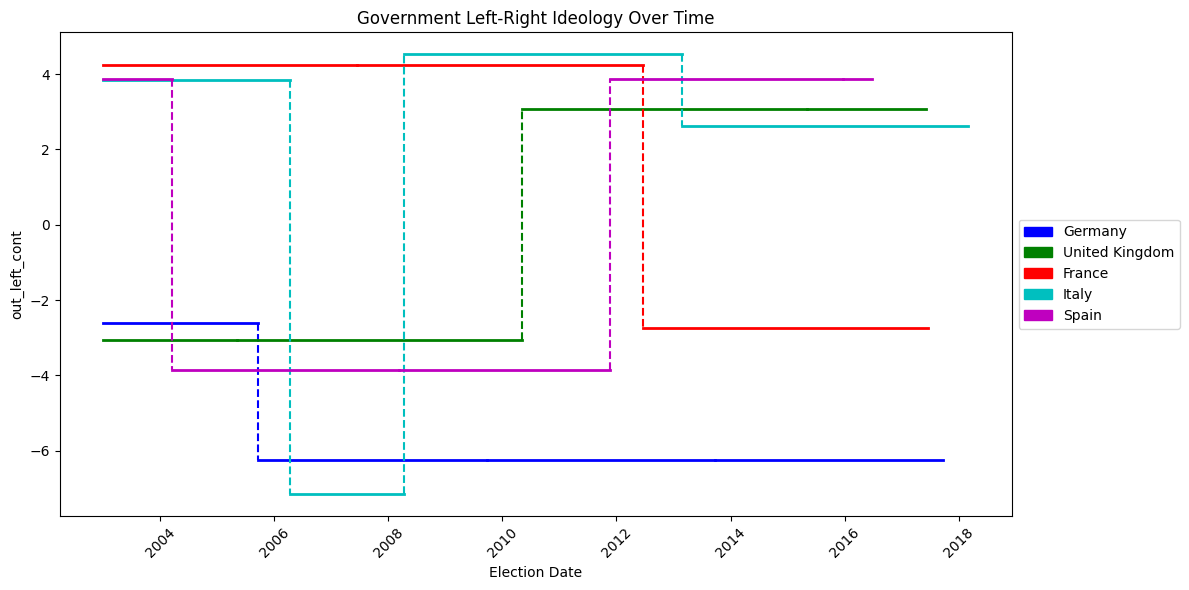

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = pd.read_csv('./EU_Data/eucommission.csv')

# Convert election_date to datetime object
data['election_date'] = pd.to_datetime(data['election_date'], format='%m/%d/%y')

# Top 5 Populated Countries
countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(12, 6))
patches = []
for i, country in enumerate(countries):
    # Filter the data for the country
    filtered_data = data[data['member_state'] == country]

    # Sort the data by election date
    filtered_data = filtered_data.sort_values('election_date')

    # Remove rows with duplicate election dates
    filtered_data = filtered_data.drop_duplicates(subset='election_date')

    # Add a data point at 1/1/03 with y value equal to the first out_eu_cont sorted by ascending election_date
    first_out_eu_cont = filtered_data.iloc[0]['out_left_cont']
    filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_left_cont': first_out_eu_cont}, ignore_index=True)
    
    # Iterate over the filtered data and plot horizontal lines
    for j in range(len(filtered_data) - 1):
        x_start = filtered_data.iloc[j - 1]['election_date']
        x_end = filtered_data.iloc[j]['election_date']
        y = filtered_data.iloc[j]['out_left_cont']
        plt.plot([x_start, x_end], [y, y], color=colors[i], lw=2)
        if x_end != pd.to_datetime('2003-01-01') and j+1 < len(filtered_data) - 1:
            plt.plot([x_end, x_end], [y, filtered_data.iloc[j + 1]['out_left_cont']], color=colors[i], linestyle='--')
    
    # Add a patch for the legend
    patch = mpatches.Patch(color=colors[i], label=country)
    patches.append(patch)

plt.xlabel('Election Date')
plt.ylabel('out_left_cont')
plt.title('Government Left-Right Ideology Over Time')
plt.xticks(rotation=45)
plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### Pro-EU Ideology  (Week 3)
The data set contains a continuous variable called out_eu_cont that indicates the difference in EU ideology between the prime minister’s party and the largest opposition party in government. Larger values indicate the opposition party is more pro-EU.

Similar to the above graph, I have plotted its change over time for the top 5 countries.

/tmp/ipykernel_1385/2097102308.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_eu_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/2097102308.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_eu_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/2097102308.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_eu_cont': first_out_eu_cont}, ignore_index=True)
/tmp/ipykernel_1385/2097102308.py:29: FutureWarning: The frame.a

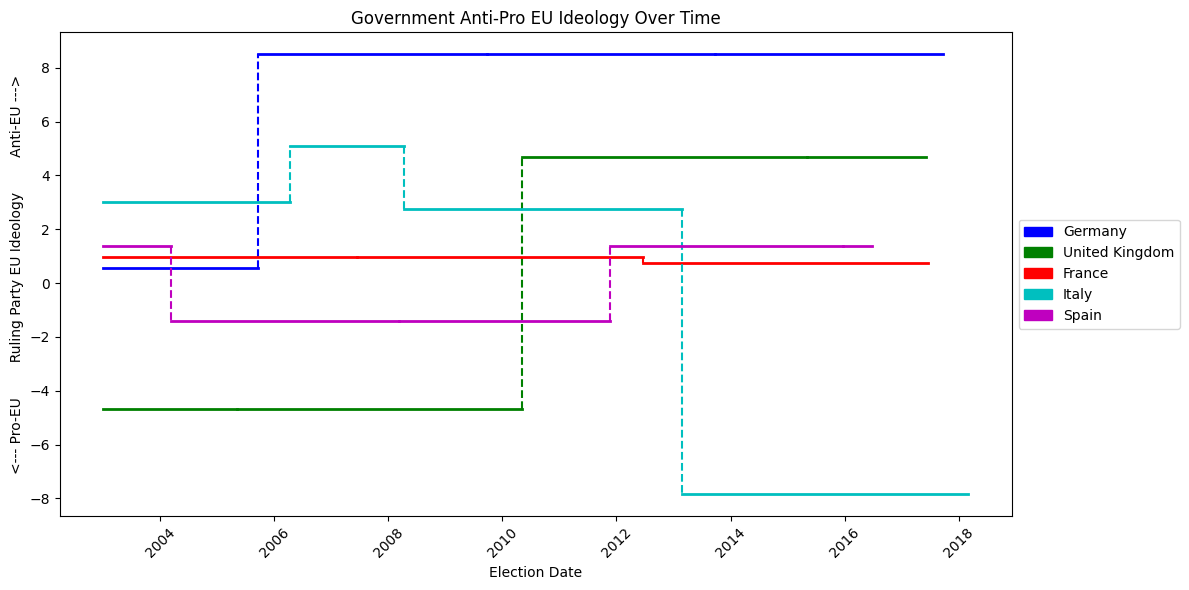

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = pd.read_csv('./EU_Data/eucommission.csv')

# Convert election_date to datetime object
data['election_date'] = pd.to_datetime(data['election_date'], format='%m/%d/%y')

# Top 5 Populated Countries
countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(12, 6))
patches = []
for i, country in enumerate(countries):
    # Filter the data for the country
    filtered_data = data[data['member_state'] == country]

    # Sort the data by election date
    filtered_data = filtered_data.sort_values('election_date')

    # Remove rows with duplicate election dates
    filtered_data = filtered_data.drop_duplicates(subset='election_date')

    # Add a data point at 1/1/03 with y value equal to the first out_eu_cont sorted by ascending election_date
    first_out_eu_cont = filtered_data.iloc[0]['out_eu_cont']
    filtered_data = filtered_data.append({'election_date': pd.to_datetime('2003-01-01'), 'out_eu_cont': first_out_eu_cont}, ignore_index=True)
    
    # Iterate over the filtered data and plot horizontal lines
    for j in range(len(filtered_data) - 1):
        x_start = filtered_data.iloc[j - 1]['election_date']
        x_end = filtered_data.iloc[j]['election_date']
        y = filtered_data.iloc[j]['out_eu_cont']
        plt.plot([x_start, x_end], [y, y], color=colors[i], lw=2)
        if x_end != pd.to_datetime('2003-01-01') and j+1 < len(filtered_data) - 1:
            plt.plot([x_end, x_end], [y, filtered_data.iloc[j + 1]['out_eu_cont']], color=colors[i], linestyle='--')
    
    # Add a patch for the legend
    patch = mpatches.Patch(color=colors[i], label=country)
    patches.append(patch)

plt.xlabel('Election Date')
plt.ylabel('<--- Pro-EU\u2002\u2002\u2002\u2002\u2002Ruling Party EU Ideology\u2002\u2002\u2002\u2002\u2002Anti-EU --->')
plt.title('Government Anti-Pro EU Ideology Over Time')
plt.xticks(rotation=45)
plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### Workload (Week 3)

The data set contains a continuous variable called worload, which indicates the number of open infringement proceedings the Commission has against the member state at the time it issues an LFN. Cheruvu's paper interprets that as the worload increases and the Commission hits more resource constraints, the Commission will have higher costs for moving a proceeding from the LFN stage to the RO stage. Unfortunately, it is difficult to prove/map this because the worload variable is calculated at the time of the LFN issue date and not the RO date. 

However, if we do map it, there are more ROs when the worload was less than zero (less no. of open proceedings) compared to positive worloads, as you can see from the figure below.

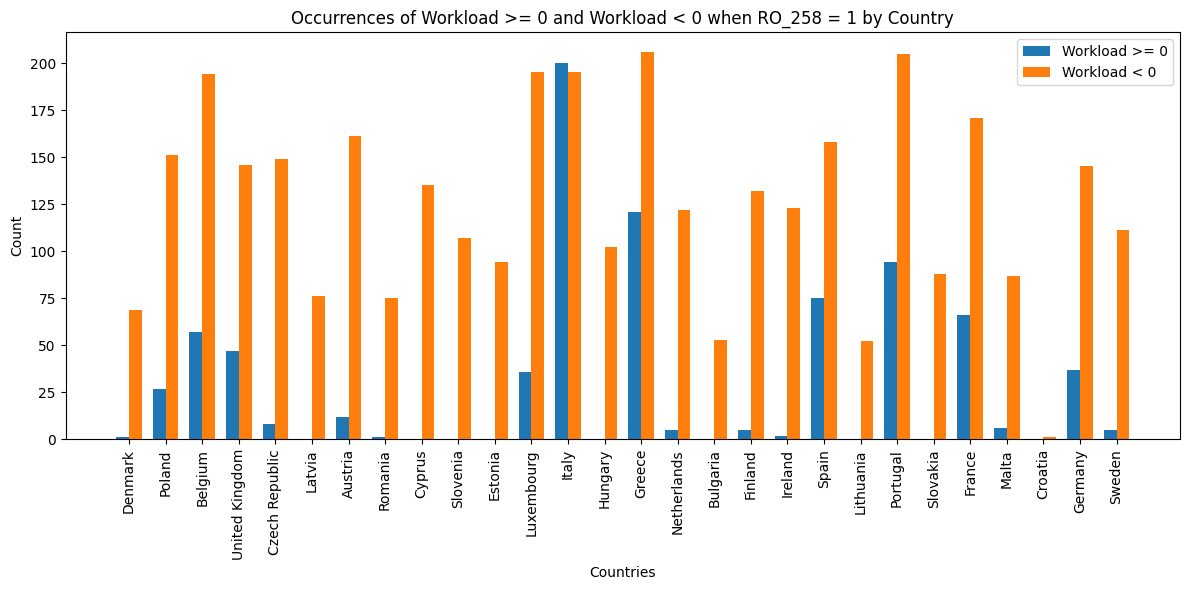

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Filter the data where RO_258 is equal to 1 and worload >= 0
ro258_greater_zero = data[(data['RO_258'] == 1) & (data['worload'] >= 0)]

# Filter the data where RO_258 is equal to 1 and worload < 0
ro258_less_zero = data[(data['RO_258'] == 1) & (data['workload'] < 0)]

countries = data['member_state'].unique()

# Calculate the count for workload > 0 and workload < 0 for each country
ro258_greater_zero_count = ro258_greater_zero.groupby('member_state')['RO_258'].count()
ro258_less_zero_count = ro258_less_zero.groupby('member_state')['RO_258'].count()

# Fill missing countries with count 0
ro258_greater_zero_count = ro258_greater_zero_count.reindex(countries, fill_value=0)
ro258_less_zero_count = ro258_less_zero_count.reindex(countries, fill_value=0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
x_positions = np.arange(len(countries))

plt.bar(x_positions - bar_width/2, ro258_greater_zero_count, width=bar_width, label='Workload >= 0')
plt.bar(x_positions + bar_width/2, ro258_less_zero_count, width=bar_width, label='Workload < 0')

plt.xticks(x_positions, countries, rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Occurrences of Workload >= 0 and Workload < 0 when RO_258 = 1 by Country')
plt.legend()
plt.tight_layout()
plt.show()


### Support Variable (Week 4)

The data set contains a continuous variable called support, which indicates the public opinion of the EU in each member state is  another aspect of a member state’s cost of compliance. In sum, as support for EU integration decreases, compliance with EU law on average should be more costly for member states. 

As observed from the figure below, over 16 of the countries have more ROs issued for the cases when the public supported EU. Interestingly, countries UK, Finland, Austria, and Sweden had public opinions against the EU for cases advanced to RO.

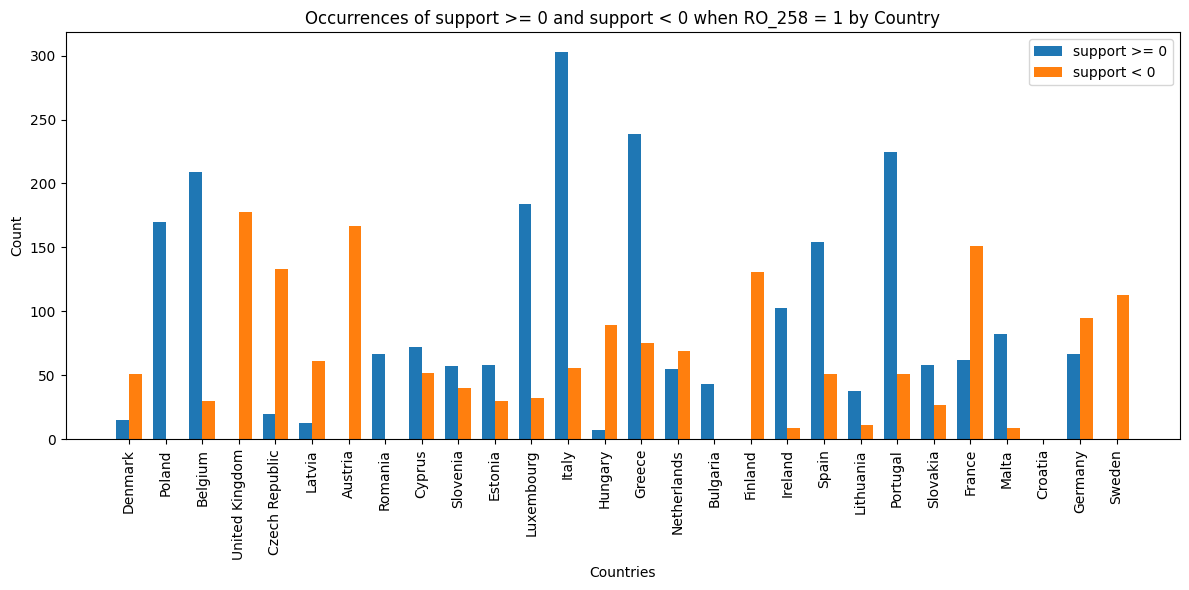

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Filter the data where RO_258 is equal to 1 and support >= 0
ro258_greater_zero = data[(data['RO_258'] == 1) & (data['support'] >= 0)]

# Filter the data where RO_258 is equal to 1 and support < 0
ro258_less_zero = data[(data['RO_258'] == 1) & (data['support'] < 0)]

countries = data['member_state'].unique()

# Calculate the count for support > 0 and support < 0 for each country
ro258_greater_zero_count = ro258_greater_zero.groupby('member_state')['RO_258'].count()
ro258_less_zero_count = ro258_less_zero.groupby('member_state')['RO_258'].count()

# Fill missing countries with count 0
ro258_greater_zero_count = ro258_greater_zero_count.reindex(countries, fill_value=0)
ro258_less_zero_count = ro258_less_zero_count.reindex(countries, fill_value=0)

plt.figure(figsize=(12, 6))
bar_width = 0.35
x_positions = np.arange(len(countries))

plt.bar(x_positions - bar_width/2, ro258_greater_zero_count, width=bar_width, label='support >= 0')
plt.bar(x_positions + bar_width/2, ro258_less_zero_count, width=bar_width, label='support < 0')

plt.xticks(x_positions, countries, rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Occurrences of support >= 0 and support < 0 when RO_258 = 1 by Country')
plt.legend()
plt.tight_layout()
plt.show()



### Multiple Election Data for a Case (Week 4)

Check if there are cases where one case has several relevant elections coming up after the LFN is issued and there is a different out_eu_cont value for all of them.

In [72]:
import pandas as pd

data = pd.read_csv('./EU_Data/eucommission.csv')

# Top 5 Populated Countries
countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']
data = data[data['member_state'].apply(lambda x: x in countries)]

# Group the data by country and case_number
grouped_data = data.groupby(['member_state', 'case_number']).size()

# Find the case numbers that were repeated in each country
repeated_case_numbers = grouped_data[grouped_data > 1]

# Loop over the countries and print the repeated case numbers along with their out_eu_cont values
for country in repeated_case_numbers.index.get_level_values('member_state').unique():
    print(country)
    country_data = data[data['member_state'] == country]
    repeated_cases = repeated_case_numbers[country].index
    for case_number in repeated_cases:
        out_eu_cont_values = country_data[country_data['case_number'] == case_number]['out_eu_cont'].unique()
        print(f"Case Number: {case_number}, out_eu_cont Values: {out_eu_cont_values}")
    print()



France
Case Number: 20062110, out_eu_cont Values: [0.9586]

Germany
Case Number: 20034350, out_eu_cont Values: [8.5024]
Case Number: 20042129, out_eu_cont Values: [0.5706 8.5024]
Case Number: 20074866, out_eu_cont Values: [8.5024]

Italy
Case Number: 20015308, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20024801, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20025058, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20034524, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20034616, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20034696, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20034722, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20034762, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20042226, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20045159, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20054347, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20054669, out_eu_cont Values: [3.0054 5.0946]
Case Number: 20062017, out_eu_cont Values: [3.0054 5.0

### Action Dissent (number of open infringements) vs Desire to Dissent (Government's ideology)

Created a Action Dissent vs Desire to Dissent graph (like Figure 1 in the manuscript), where the desire to dissent would be reflected by the government's ideology and action could possibly measured by workload. This is for cases specifically for cases where the LFN issue date and the election date overlapped (about 20% of the data). For now, I am only displaying results for Italy (country with highest number of LFNs).

#### Results:
It seems that this approach is not correct. There are multiple values of workload for a unique value of out_eu_cont. Next, looking for alternatives for the Action variable (likely ROs).

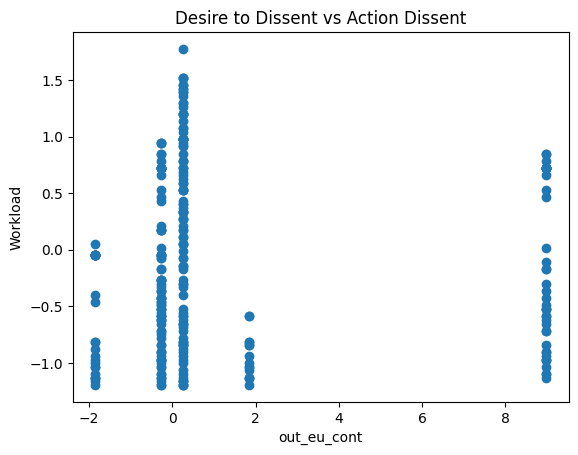

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./EU_Data/eucommission.csv')

# Filter the data where LFN_election is equal to 1
filtered_data = data[(data['member_state'] == 'Italy') & (data['LFN_election'] == 1)]

# Extract the desired columns
workload = filtered_data['workload']
out_eu_cont = filtered_data['out_eu_cont']

# Plot the graph
plt.scatter(out_eu_cont, workload)
plt.xlabel('out_eu_cont')
plt.ylabel('Workload')
plt.title('Desire to Dissent vs Action Dissent')
plt.show()


#### Non-Communication & Non-Conformity Proceedings

The paper states that “Launching a noncommunication proceeding is more or less automatic by the Commission, and most member states quickly comply following an LFN. The Commission will launch noncommunication proceed ings against multiple member states together if they fail to transpose a directive on time.”

Thus, I calculated the total no. of Non-Communcation proceedings where RO stage was reached vs where it was not. Over 11000 proceedings out of the total proceedings were Non-Communcation and about 80% did not reach an RO stage.

In [18]:
import pandas as pd

data = pd.read_csv('./EU_Data/eucommission.csv')

# Non-Communication Proceeding
ro_stage_not_reached = len(data[(data['incorrect'] == 0) & (data['RO_258'] == 0)])
ro_stage_reached = len(data[(data['incorrect'] == 0) & (data['RO_258'] == 1)])
total_non_communication_proceedings = ro_stage_reached + ro_stage_not_reached

rf_stage_not_reached = len(data[(data['incorrect'] == 0) & (data['RF_258'] == 0) & (data['RO_258'] == 1)])
rf_stage_reached = len(data[(data['incorrect'] == 0) & (data['RF_258'] == 1)])

print("Total Non-Communication proceedings where it alteast reached the RO stage:", ro_stage_reached, f"({(ro_stage_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")
print("Total Non-Communication proceedings where it did not reach the RO stage:", ro_stage_not_reached, f"({(ro_stage_not_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")

print()

print("Total Non-Communication proceedings where it reached the RF stage:", rf_stage_reached, f"({(rf_stage_reached / total_non_communication_proceedings) * 100:.2f}% of total Non-Communcation Proceedings)")
print("----")

# Non-Conformity Proceeding
ro_stage_not_reached_nc = len(data[(data['incorrect'] == 1) & (data['RO_258'] == 0)])
ro_stage_reached_nc = len(data[(data['incorrect'] == 1) & (data['RO_258'] == 1)])
total_non_conformity_proceedings_nc = ro_stage_reached_nc + ro_stage_not_reached_nc

rf_stage_not_reached_nc = len(data[(data['incorrect'] == 1) & (data['RF_258'] == 0) & (data['RO_258'] == 1)])
rf_stage_reached_nc = len(data[(data['incorrect'] == 1) & (data['RF_258'] == 1)])

print("Total Non-Conformity proceedings where it alteast reached the RO stage:", ro_stage_reached_nc, f"({(ro_stage_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")
print("Total Non-Conformity proceedings where it did not reach the RO stage:", ro_stage_not_reached_nc, f"({(ro_stage_not_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")

print()

print("Total Non-Conformity proceedings where it reached the RF stage:", rf_stage_reached_nc, f"({(rf_stage_reached_nc / total_non_conformity_proceedings_nc) * 100:.2f}% of total Non-Conformity Proceedings)")


Total Non-Communication proceedings where it alteast reached the RO stage: 2555 (23.44% of total Non-Communcation Proceedings)
Total Non-Communication proceedings where it did not reach the RO stage: 8343 (76.56% of total Non-Communcation Proceedings)

Total Non-Communication proceedings where it reached the RF stage: 491 (4.51% of total Non-Communcation Proceedings)
----
Total Non-Conformity proceedings where it alteast reached the RO stage: 1753 (39.53% of total Non-Conformity Proceedings)
Total Non-Conformity proceedings where it did not reach the RO stage: 2682 (60.47% of total Non-Conformity Proceedings)

Total Non-Conformity proceedings where it reached the RF stage: 525 (11.84% of total Non-Conformity Proceedings)


#### Incorrect, LFN, RO, and RF Over Time

Bar graph showing the number of Non-Conformity, Non-Communication, LFNs, ROs, and RFs issued per year

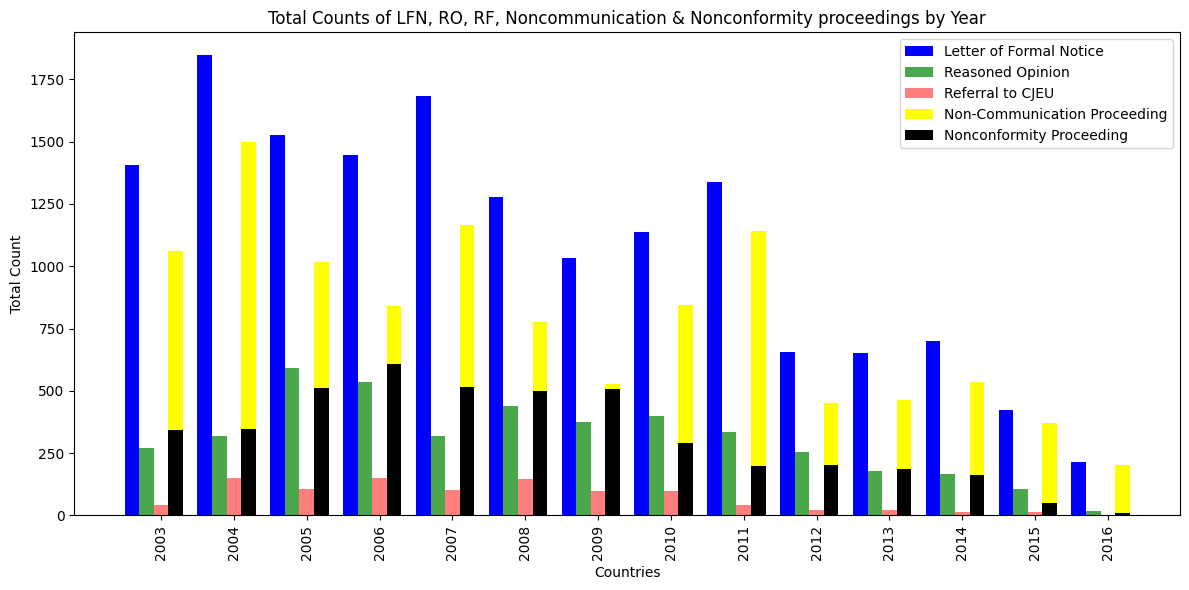

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Group by member_state
grouped_data = data.groupby('year').agg({
    'LFN_258': 'sum',
    'RO_258': 'sum',
    'RF_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Convert date_LFN_258, date_RO_258, date_RF_258 to datetime objects
data['date_LFN_258'] = pd.to_datetime(data['date_LFN_258'], format='%m/%d/%y')
data['date_RO_258'] = pd.to_datetime(data['date_RO_258'], format='%m/%d/%y')
data['date_RF_258'] = pd.to_datetime(data['date_RF_258'], format='%m/%d/%y')

# Group by year and aggregate the counts for LFN_258 and incorrect by date_LFN_258
grouped_data_lfn = data.groupby(data['date_LFN_258'].dt.year).agg({
    'LFN_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Group by year and aggregate the count for RO_258 by date_RO_258
grouped_data_ro = data.groupby(data['date_RO_258'].dt.year).agg({
    'RO_258': 'sum'
}).reset_index()

# Group by year and aggregate the count for RF_258 by date_RF_258
grouped_data_rf = data.groupby(data['date_RF_258'].dt.year).agg({
    'RF_258': 'sum'
}).reset_index()

grouped_data_2 =  data.groupby(data['date_LFN_258'].dt.year).agg({
    'incorrect': lambda x: x.eq(0).sum()
}).reset_index()

plt.figure(figsize=(12, 6))

# Get the countries
years = grouped_data['year']

lfn_counts = grouped_data_lfn['LFN_258']
incorrect_1_counts = grouped_data_lfn['incorrect']
ro_counts = grouped_data_ro['RO_258']
rf_counts = grouped_data_rf['RF_258']
incorrect_0_counts = grouped_data_2['incorrect']


bar_width = 0.2
x_positions = np.arange(len(years))

# Plot the bars for each category
plt.bar(x_positions - 2 * bar_width, lfn_counts, width=bar_width, label='Letter of Formal Notice', color='blue')
plt.bar(x_positions - bar_width, ro_counts, width=bar_width, label='Reasoned Opinion', color='green', alpha=0.7)
plt.bar(x_positions, rf_counts, width=bar_width, label='Referral to CJEU', color='red', alpha=0.5)
plt.bar(x_positions + bar_width, incorrect_0_counts, width=bar_width, label='Non-Communication Proceeding', color='yellow')
plt.bar(x_positions + bar_width, incorrect_1_counts, width=bar_width, label='Nonconformity Proceeding', color='black')


plt.xticks(x_positions, years, rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.title('Total Counts of LFN, RO, RF, Noncommunication & Nonconformity proceedings by Year')
plt.legend()
plt.tight_layout()
plt.show()


#### Incorrect and LFN Over Time

Bar graph showing the number of Non-Conformity, Non-Communication, and LFNs issued per year. Variables are potential proxys for a_i,t (action) model variable

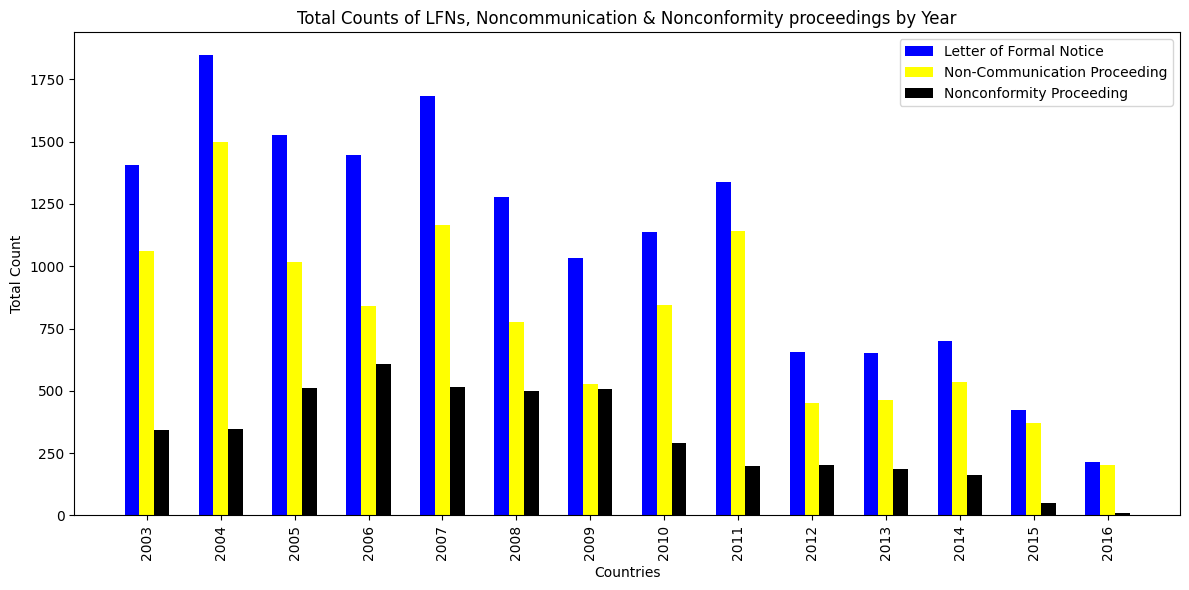

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Group by member_state
grouped_data = data.groupby('year').agg({
    'LFN_258': 'sum',
    'RO_258': 'sum',
    'RF_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Convert date_LFN_258, date_RO_258, date_RF_258 to datetime objects
data['date_LFN_258'] = pd.to_datetime(data['date_LFN_258'], format='%m/%d/%y')
data['date_RO_258'] = pd.to_datetime(data['date_RO_258'], format='%m/%d/%y')
data['date_RF_258'] = pd.to_datetime(data['date_RF_258'], format='%m/%d/%y')

# Group by year and aggregate the counts for LFN_258 and incorrect by date_LFN_258
grouped_data_lfn = data.groupby(data['date_LFN_258'].dt.year).agg({
    'LFN_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Group by year and aggregate the count for RO_258 by date_RO_258
grouped_data_ro = data.groupby(data['date_RO_258'].dt.year).agg({
    'RO_258': 'sum'
}).reset_index()

# Group by year and aggregate the count for RF_258 by date_RF_258
grouped_data_rf = data.groupby(data['date_RF_258'].dt.year).agg({
    'RF_258': 'sum'
}).reset_index()

grouped_data_2 =  data.groupby(data['date_LFN_258'].dt.year).agg({
    'incorrect': lambda x: x.eq(0).sum()
}).reset_index()

plt.figure(figsize=(12, 6))

# Get the countries
years = grouped_data['year']

lfn_counts = grouped_data_lfn['LFN_258']
incorrect_1_counts = grouped_data_lfn['incorrect']
ro_counts = grouped_data_ro['RO_258']
rf_counts = grouped_data_rf['RF_258']
incorrect_0_counts = grouped_data_2['incorrect']


bar_width = 0.2
x_positions = np.arange(len(years))

# Plot the bars for each category
plt.bar(x_positions - bar_width, lfn_counts, width=bar_width, label='Letter of Formal Notice', color='blue')
plt.bar(x_positions, incorrect_0_counts, width=bar_width, label='Non-Communication Proceeding', color='yellow')
plt.bar(x_positions + bar_width, incorrect_1_counts, width=bar_width, label='Nonconformity Proceeding', color='black')


plt.xticks(x_positions, years, rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.title('Total Counts of LFNs, Noncommunication & Nonconformity proceedings by Year')
plt.legend()
plt.tight_layout()
plt.show()


#### ROs and RFs Over Time

Bar graph showing the number ROs and RFs issued per year. Variables are potential proxys for p_i,t (punishment) model variable

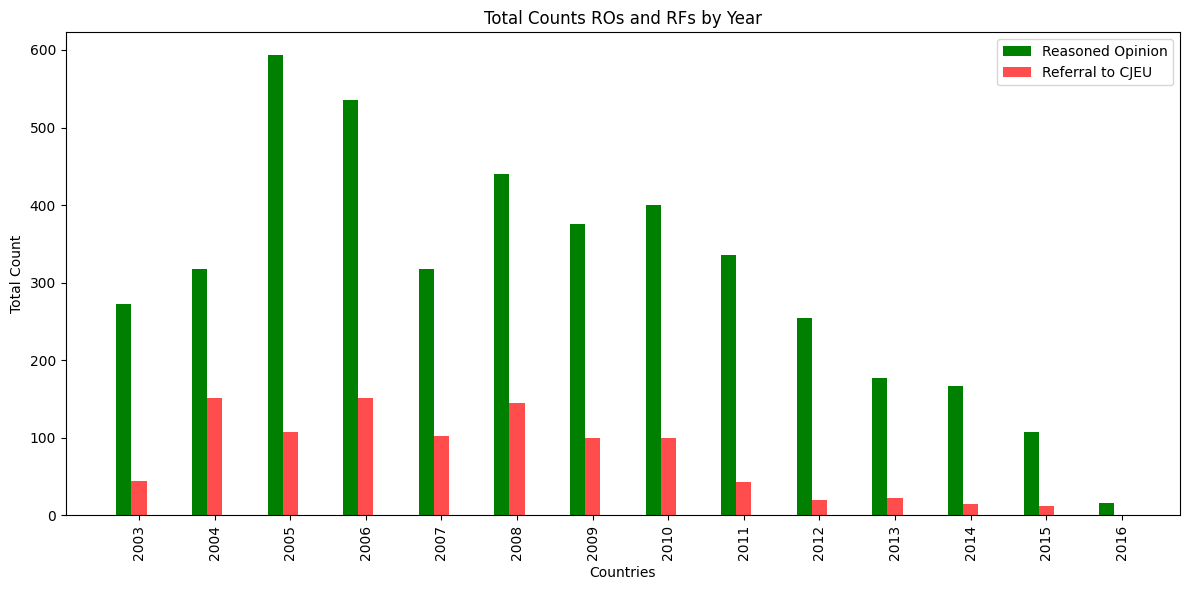

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./EU_Data/eucommission.csv')

# Group by member_state
grouped_data = data.groupby('year').agg({
    'LFN_258': 'sum',
    'RO_258': 'sum',
    'RF_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Convert date_LFN_258, date_RO_258, date_RF_258 to datetime objects
data['date_LFN_258'] = pd.to_datetime(data['date_LFN_258'], format='%m/%d/%y')
data['date_RO_258'] = pd.to_datetime(data['date_RO_258'], format='%m/%d/%y')
data['date_RF_258'] = pd.to_datetime(data['date_RF_258'], format='%m/%d/%y')

# Group by year and aggregate the counts for LFN_258 and incorrect by date_LFN_258
grouped_data_lfn = data.groupby(data['date_LFN_258'].dt.year).agg({
    'LFN_258': 'sum',
    'incorrect': 'sum'
}).reset_index()

# Group by year and aggregate the count for RO_258 by date_RO_258
grouped_data_ro = data.groupby(data['date_RO_258'].dt.year).agg({
    'RO_258': 'sum'
}).reset_index()

# Group by year and aggregate the count for RF_258 by date_RF_258
grouped_data_rf = data.groupby(data['date_RF_258'].dt.year).agg({
    'RF_258': 'sum'
}).reset_index()

grouped_data_2 =  data.groupby(data['date_LFN_258'].dt.year).agg({
    'incorrect': lambda x: x.eq(0).sum()
}).reset_index()

plt.figure(figsize=(12, 6))

# Get the countries
years = grouped_data['year']

lfn_counts = grouped_data_lfn['LFN_258']
incorrect_1_counts = grouped_data_lfn['incorrect']
ro_counts = grouped_data_ro['RO_258']
rf_counts = grouped_data_rf['RF_258']
incorrect_0_counts = grouped_data_2['incorrect']


bar_width = 0.2
x_positions = np.arange(len(years))

# Plot the bars for each category
plt.bar(x_positions - bar_width, ro_counts, width=bar_width, label='Reasoned Opinion', color='green')
plt.bar(x_positions, rf_counts, width=bar_width, label='Referral to CJEU', color='red', alpha=0.7)


plt.xticks(x_positions, years, rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.title('Total Counts ROs and RFs by Year')
plt.legend()
plt.tight_layout()
plt.show()
